### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\sudar\NetzwerkAcademyData\ML Projects\Suicide Prediction\suicide_statistics.csv")

In [3]:
data = data.sort_values(["year"],ascending=True) 
print(data.shape)
data.head()

(43776, 6)


,country,year,sex,age,suicides_no,population
6204,Brazil,1979,female,15-24 years,385.0,12448100.0
26470,Netherlands,1979,male,55-74 years,217.0,1040500.0
26471,Netherlands,1979,male,75+ years,93.0,235800.0
2615,Austria,1979,male,75+ years,NaN,141900.0
2614,Austria,1979,male,55-74 years,NaN,573800.0


#### Data Visualization

<AxesSubplot:title={'center':'Correlation Matrix'}>

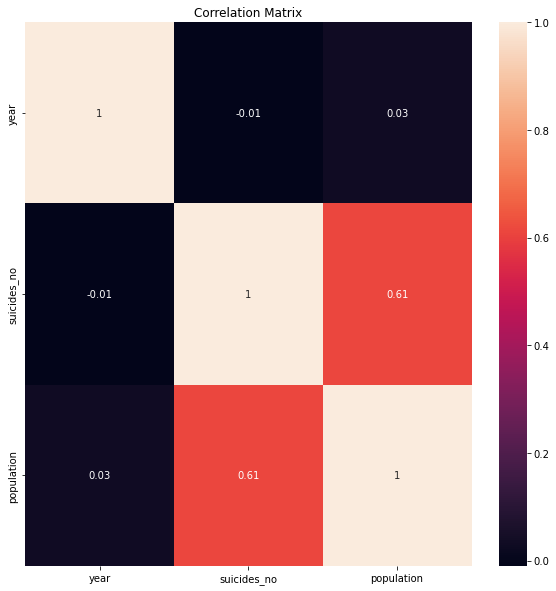

In [4]:
# correlation plot
plt.figure(figsize=(10,10))
Corr = data.corr()
plt.title("Correlation Matrix")
sns.heatmap(round(Corr,2),annot=True) 

In [5]:
# renaming the columns
data.rename({'sex' : 'gender', 'suicides_no' : 'suicides'}, inplace = True, axis = 1)
data.columns

Index(['country', 'year', 'gender', 'age', 'suicides', 'population'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43776 entries, 6204 to 25858
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     43776 non-null  object 
 1   year        43776 non-null  int64  
 2   gender      43776 non-null  object 
 3   age         43776 non-null  object 
 4   suicides    41520 non-null  float64
 5   population  38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
data.describe()

,year,suicides,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [8]:
data.isnull().sum()

country          0
year             0
gender           0
age              0
suicides      2256
population    5460
dtype: int64

In [9]:
data["country"].value_counts().count()

141

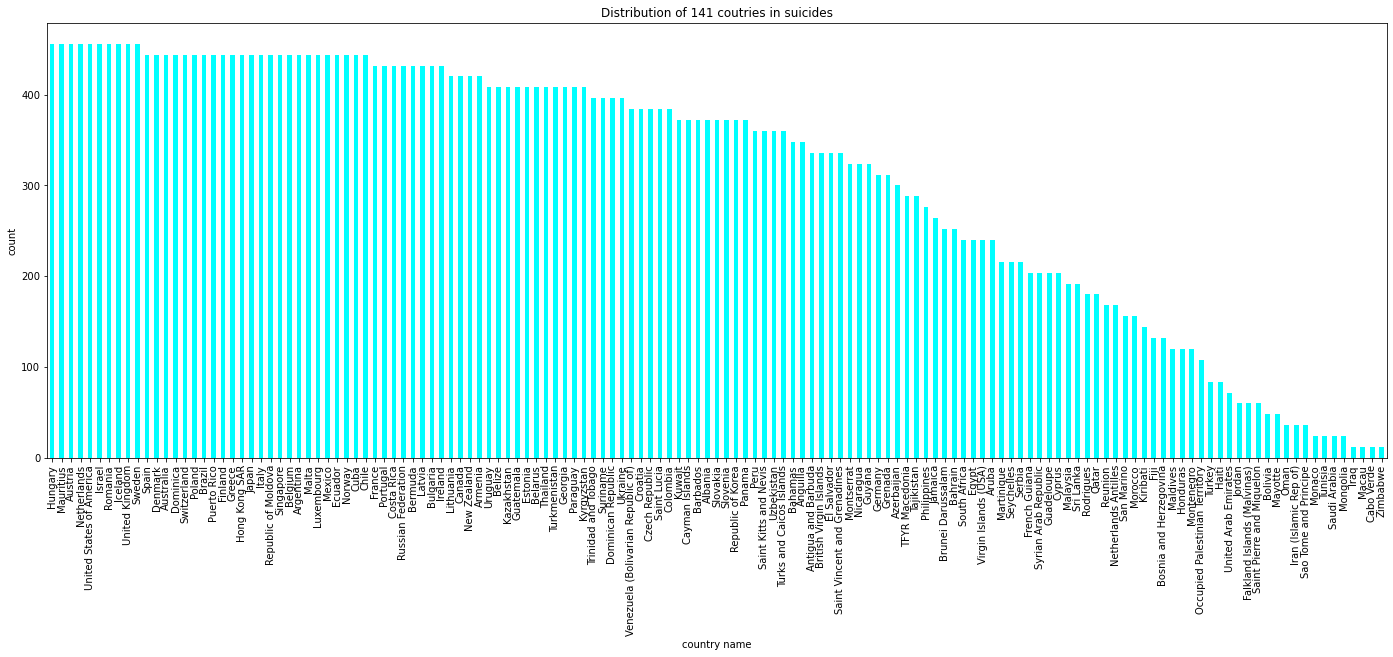

In [10]:
# visualising the different countries distribution in the dataset
data["country"].value_counts(normalize=True)
data["country"].value_counts(dropna=False).plot.bar(color ="cyan", figsize=(24,8))

plt.title('Distribution of 141 coutries in suicides')
plt.xlabel('country name')
plt.ylabel('count')
plt.show()

In [11]:
data["year"].value_counts().count()

38

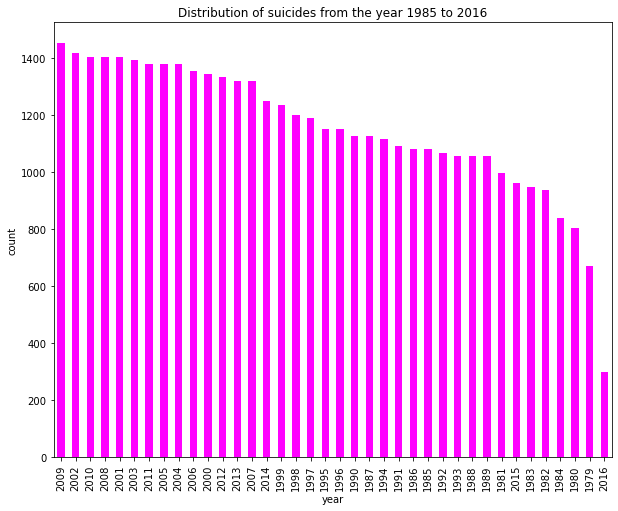

In [12]:
# visualising the different countries distribution in the dataset
data["year"].value_counts(normalize=True)
data["year"].value_counts(dropna=False).plot.bar(color ="magenta", figsize=(10,8))

plt.title('Distribution of suicides from the year 1985 to 2016')
plt.xlabel('year')
plt.ylabel('count')
plt.show()

In [13]:
# label encoding for gender
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
data["gender"] = Le.fit_transform(data["gender"])
data["gender"].value_counts()

0    21888
1    21888
Name: gender, dtype: int64

In [14]:
# replacing categorical values in the age column

data['age'] = data['age'].replace('5-14 years', 0)
data['age'] = data['age'].replace('15-24 years', 1)
data['age'] = data['age'].replace('25-34 years', 2)
data['age'] = data['age'].replace('35-54 years', 3)
data['age'] = data['age'].replace('55-74 years', 4)
data['age'] = data['age'].replace('75+ years', 5)

data['age'].value_counts()

1    7296
4    7296
5    7296
0    7296
3    7296
2    7296
Name: age, dtype: int64

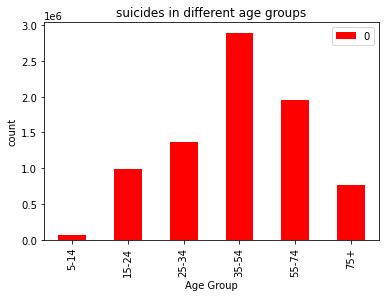

In [15]:
# suicides in different age groups

x1 = data[data['age']==0]["suicides"].sum()
x2 = data[data['age']==1]["suicides"].sum()
x3 = data[data['age']==2]["suicides"].sum()
x4 = data[data['age']==3]["suicides"].sum()
x5 = data[data['age']==4]["suicides"].sum()
x6 = data[data['age']==5]["suicides"].sum()

x = pd.DataFrame([x1,x2,x3,x4,x5,x6])
x.index = ["5-14","15-24","25-34","35-54","55-74","75+"]
x.plot(kind = "bar", color = "red")

plt.title('suicides in different age groups')
plt.xlabel('Age Group')
plt.ylabel('count')
plt.show()

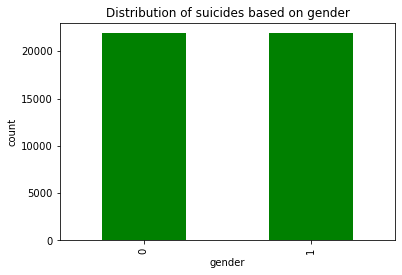

In [16]:
# visualising the gender distribution in the dataset

data['gender'].value_counts(normalize = True)
data['gender'].value_counts(dropna = False).plot.bar(color = 'green', figsize = (6, 4))

plt.title('Distribution of suicides based on gender')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

In [17]:
# total population of 141 countres over which the suicides survey is committed

data["population"].sum()

63761315943.0

In [18]:
# Average population

Average_population = data['population'].mean()
print(Average_population)

1664091.1353742562


In [19]:
# total number of suicides committed in the 141 countries from 1985 to 2016

data["suicides"].sum()

8026455.0

In [20]:
# Average suicide

Average_suicide = data['suicides'].mean()
print(Average_suicide)

193.3153901734104


In [21]:
# Imputing the NaN values from the population column

data["population"] = data["population"].fillna(data["population"].median())
data["population"].isnull().any()

False

In [22]:
# Imputing the values suicides no column

data["suicides"]=data["suicides"].fillna(0)
data["suicides"].isnull().any()

False

In [25]:
# rearranging the columns 

data = data[['country', 'year', 'gender', 'age', 'population', 'suicides']]
data.head(0)

,country,year,gender,age,population,suicides


In [26]:
data = data.drop("country",axis =True)
data.head(0)

,year,gender,age,population,suicides


In [27]:
#splitting the data into dependent and independent variables

x = data.iloc[:,:-1]
y = data.iloc[:,-1]

print(x.shape)
print(y.shape)

(43776, 4)
(43776,)


In [28]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32832, 4)
(32832,)
(10944, 4)
(10944,)


In [30]:
# min max scaling

# importing the min max scaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# scaling the independent variables
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(32832, 4)
(10944, 4)


In [31]:
# using principal component analysis

from sklearn.decomposition import PCA

# creating a principal component analysis model
pca = PCA(n_components = None)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# visualising the principal components that will explain the highest share of variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# creating a principal component analysis model
pca = PCA(n_components = 1)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

[0.5548812  0.25771272 0.17356927 0.01383681]


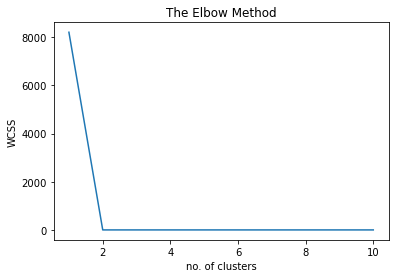

In [32]:
# applying k means clustering

# selecting the best choice for no. of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x_train)
  wcss.append(km.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# applying kmeans with 4 clusters

#km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
#y_means = km.fit_predict(x_train)

# visualising the clusters

#plt.scatter(x_train[y_means == 0, 0], x_train[y_means == 0, 1], s = 100, c = 'pink', label = 'cluster 1')
#plt.scatter(x_train[y_means == 1, 0], x_train[y_means == 1, 1], s = 100, c = 'cyan', label = 'cluster 2')
#plt.scatter(x_train[y_means == 2, 0], x_train[y_means == 2, 1], s = 100, c = 'magenta', label = 'cluster 3')
#plt.scatter(x_train[y_means == 3, 0], x_train[y_means == 3, 1], s = 100, c = 'violet', label = 'cluster 4')

#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 100, c = 'red', label = 'centroids')

#plt.title('Cluster of Clients')
#plt.xlabel('cc')
#plt.show()

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# creating the model
model = LinearRegression()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 577855.2218449378
RMSE : 760.1678905642738
r2_score : 0.014156970645678113


In [40]:
from sklearn.svm import SVR

# creating the model
model = SVR()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)


MSE : 612609.9034556412
RMSE : 782.6940037176989
r2_score : -0.045135840612386735


In [36]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 708820.6255170178
RMSE : 841.9148564534407
r2_score : -0.20927499884398038


In [37]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 897486.2087806183
RMSE : 947.3574873196592
r2_score : -0.5311456735532196


In [38]:
from sklearn.ensemble import AdaBoostRegressor

# creating the model
model = AdaBoostRegressor()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)


MSE : 1040135.4570540694
RMSE : 1019.8703138409654
r2_score : -0.7745107271803207


In [39]:
from sklearn.neural_network import MLPClassifier

# creating the model
model = MLPClassifier(hidden_layer_sizes = 100, max_iter = 50 )

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

C:\Users\sudar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MSE : 618602.6730628655
RMSE : 786.5129834038759
r2_score : -0.055359733934569944
